# Preparation

In [1]:
%matplotlib inline

import json
import random
import matplotlib.pyplot as plt
from collections import Counter
from datasets import load_dataset
import numpy as np

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Firstly, I will load the original dataset.

In [5]:
# Load the CNN/DailyMail dataset
cnn_dailymail = load_dataset("cnn_dailymail", "3.0.0")

# Access train, validation, and test splits
train_original_data = cnn_dailymail['train']
val_original_data = cnn_dailymail['validation']
test_original_data = cnn_dailymail['test']

print("CNN/DailyMail dataset loaded successfully.")

CNN/DailyMail dataset loaded successfully.


Next, I will preview the original dataset.

In [4]:
# Preview the first 3 samples from the training set
for i in range(3):
    sample = train_original_data[i]
    print(f"Sample {i+1}:")
    print("Article:", sample['article'][:300], "...")
    print("Highlights:", sample['highlights'])
    print("ID:", sample['id'])
    print("-" * 80)

Sample 1:
Article: LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappoi ...
Highlights: Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .
Young actor says he has no plans to fritter his cash away .
Radcliffe's earnings from first five Potter films have been held in trust fund .
ID: 42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
--------------------------------------------------------------------------------
Sample 2:
Article: Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many men 

In [25]:
# Get all articles and highlights from the original training dataset
all_texts_original = [sample['article'] for sample in train_original_data] + [sample['highlights'] for sample in train_original_data]

# Tokenize and split into words
all_words_original = []
for text in all_texts_original:
    all_words_original.extend(text.split())

# Get unique words
vocab_original = set(all_words_original)
print(f"Number of unique words in the orignal training dataset vocabulary: {len(vocab_original)}")

Number of unique words in the orignal training dataset vocabulary: 2097994


In [26]:
# Get all articles and highlights from the original validation dataset
all_texts_original_val = [sample['article'] for sample in val_original_data] + [sample['highlights'] for sample in val_original_data]

# Tokenize and split into words
all_words_original_val = []
for text in all_texts_original_val:
    all_words_original_val.extend(text.split())

# Get unique words
vocab_original_val = set(all_words_original_val)
print(f"Number of unique words in the orignal validation dataset vocabulary: {len(vocab_original_val)}")

Number of unique words in the orignal validation dataset vocabulary: 311783


In [27]:
# Get all articles and highlights from the original testing dataset
all_texts_original_test = [sample['article'] for sample in test_original_data] + [sample['highlights'] for sample in test_original_data]

# Tokenize and split into words
all_words_original_test = []
for text in all_texts_original_test:
    all_words_original_test.extend(text.split())

# Get unique words
vocab_original_test = set(all_words_original_test)
print(f"Number of unique words in the orignal testing dataset vocabulary: {len(vocab_original_test)}")

Number of unique words in the orignal testing dataset vocabulary: 291961


In [6]:
# Calculate average length of articles and highlights for each split
def average_length(dataset, field):
    return np.mean([len(sample[field].split()) for sample in dataset])

avg_article_len_train = average_length(train_original_data, 'article')
avg_highlights_len_train = average_length(train_original_data, 'highlights')

avg_article_len_val = average_length(val_original_data, 'article')
avg_highlights_len_val = average_length(val_original_data, 'highlights')

avg_article_len_test = average_length(test_original_data, 'article')
avg_highlights_len_test = average_length(test_original_data, 'highlights')

print(f"Original train set - Avg article length: {avg_article_len_train:.2f} words, Avg highlights length: {avg_highlights_len_train:.2f} words")
print(f"Original validation set - Avg article length: {avg_article_len_val:.2f} words, Avg highlights length: {avg_highlights_len_val:.2f} words")
print(f"Original test set - Avg article length: {avg_article_len_test:.2f} words, Avg highlights length: {avg_highlights_len_test:.2f} words")

Original train set - Avg article length: 691.87 words, Avg highlights length: 51.57 words
Original validation set - Avg article length: 676.03 words, Avg highlights length: 57.91 words
Original test set - Avg article length: 683.51 words, Avg highlights length: 55.01 words


In [ ]:
def min_max_length(dataset, field):
    lengths = [len(sample[field].split()) for sample in dataset]
    return min(lengths), max(lengths)

min_article_len_train, max_article_len_train = min_max_length(train_original_data, 'article')
min_article_len_val, max_article_len_val = min_max_length(val_original_data, 'article')
min_article_len_test, max_article_len_test = min_max_length(test_original_data, 'article')

print(f"Train set - Shortest article: {min_article_len_train} words, Longest article: {max_article_len_train} words")
print(f"Validation set - Shortest article: {min_article_len_val} words, Longest article: {max_article_len_val} words")
print(f"Test set - Shortest article: {min_article_len_test} words, Longest article: {max_article_len_test} words")

Train set - Shortest article: 8 words, Longest article: 2347 words
Validation set - Shortest article: 41 words, Longest article: 1917 words
Test set - Shortest article: 55 words, Longest article: 1954 words


In [27]:
# Find the shortest and longest highlight length for each split

min_highlight_len_train = min(highlight_lengths)
max_highlight_len_train = max(highlight_lengths)

min_highlight_len_val = min(highlight_lengths_val)
max_highlight_len_val = max(highlight_lengths_val)

min_highlight_len_test = min(highlight_lengths_test)
max_highlight_len_test = max(highlight_lengths_test)

print(f"Original train set - Shortest highlight: {min_highlight_len_train} words, Longest highlight: {max_highlight_len_train} words")
print(f"Original validation set - Shortest highlight: {min_highlight_len_val} words, Longest highlight: {max_highlight_len_val} words")
print(f"Original test set - Shortest highlight: {min_highlight_len_test} words, Longest highlight: {max_highlight_len_test} words")

Original train set - Shortest highlight: 4 words, Longest highlight: 1296 words
Original validation set - Shortest highlight: 10 words, Longest highlight: 1440 words
Original test set - Shortest highlight: 9 words, Longest highlight: 564 words


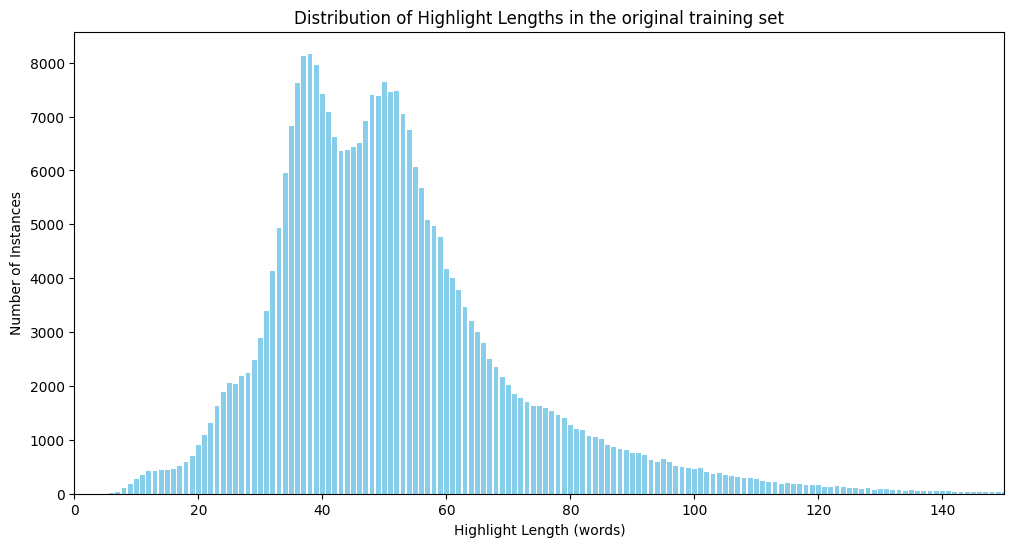

In [26]:
# Calculate the length of each highlight in the training set
highlight_lengths = [len(sample['highlights'].split()) for sample in train_original_data]

# Count the number of instances for each highlight length
length_counts = Counter(highlight_lengths)

# Prepare data for plotting
lengths = list(length_counts.keys())
counts = list(length_counts.values())

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(lengths, counts, color='skyblue')
plt.xlabel('Highlight Length (words)')
plt.ylabel('Number of Instances')
plt.title('Distribution of Highlight Lengths in the original training set')
plt.xlim(0, 150)  # Limit x-axis for better visualization
plt.show()

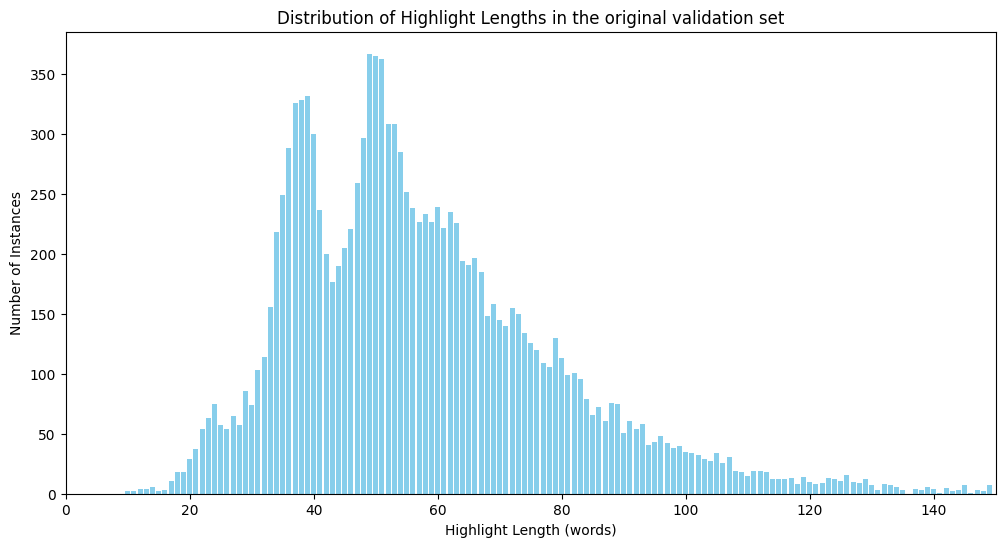

In [24]:
# Calculate the length of each highlight in the validation sets
highlight_lengths_val = [len(sample['highlights'].split()) for sample in val_original_data]

# Count the number of instances for each highlight length
length_counts_val = Counter(highlight_lengths_val)

# Prepare data for plotting
lengths_val = list(length_counts_val.keys())
counts_val = list(length_counts_val.values())

# Plot the distribution for validation set
plt.figure(figsize=(12, 6))
plt.bar(lengths_val, counts_val, color='skyblue')
plt.xlabel('Highlight Length (words)')
plt.ylabel('Number of Instances')
plt.title('Distribution of Highlight Lengths in the original validation set')
plt.xlim(0, 150)
plt.show()

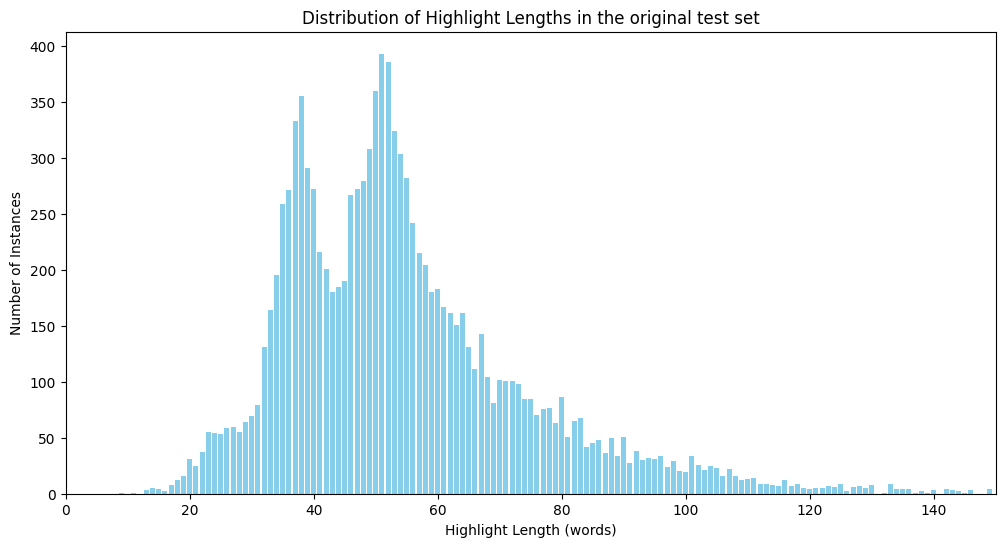

In [25]:
# Calculate the length of each highlight in the test sets
highlight_lengths_test = [len(sample['highlights'].split()) for sample in test_original_data]

# Count the number of instances for each highlight length
length_counts_test = Counter(highlight_lengths_test)

# Prepare data for plotting
lengths_test = list(length_counts_test.keys())
counts_test = list(length_counts_test.values())

# Plot the distribution for test set
plt.figure(figsize=(12, 6))
plt.bar(lengths_test, counts_test, color='skyblue')
plt.xlabel('Highlight Length (words)')
plt.ylabel('Number of Instances')
plt.title('Distribution of Highlight Lengths in the original test set')
plt.xlim(0, 150)
plt.show()

Due to hardware limitations, I can only utilize 20% of the dataset to avoid running out of memory. Therefore, I will perform exploratory data analysis (EDA) on the subset of the dataset used for training the models. As a first step, I will preview the data.

In [20]:
# Load the subset of the CNN/DailyMail dataset from Hugging Face
cnn_dailymail_subset = load_dataset("TheSyx/cnn_dailymail_subset")

# Preview the available splits and number of rows
train_dataset = cnn_dailymail_subset['train']
val_dataset = cnn_dailymail_subset['validation']
test_dataset = cnn_dailymail_subset['test']

print("CNN/DailyMail subset loaded successfully.")

CNN/DailyMail subset loaded successfully.


In [22]:
# Preview the first 3 samples from the training set
for i in range(3):
    sample = train_dataset[i]
    print(f"Sample {i+1}:")
    print("Article:", sample['article'][:300], "...")
    print("Highlights:", sample['highlights'])
    print("ID:", sample['id'])
    print("-" * 80)

Sample 1:
Article: By . Daily Mail Reporter . PUBLISHED: . 09:08 EST, 23 February 2013 . | . UPDATED: . 10:25 EST, 23 February 2013 . North Korea today warned the top American commander in South Korea of 'miserable destruction' if the U.S. military presses ahead with routine joint drills with South Korea set to begin  ...
Highlights: North Korea's Pak Rim Su sent a rare direct message to U.S. general .
U.S. military preparing for routine joint drills with South Korea .
Message warned of 'miserable destruction' if 'reckless' drills go ahead .
Strong words come after North conducted nuclear test earlier this month .
ID: 7b5e4ded49f047c6d04ddc28c5519c9d8b2c3d6a
--------------------------------------------------------------------------------
Sample 2:
Article: KRASNOYARSK, Russia (CNN)  -- "It kept you alive," a tearful Dwight Griffith told his adopted son as the two looked at an infant incubator during a tour of the Russian hospital where he was born. Alex Griffith, 16, raised more than $

In [23]:
# Get all articles and highlights from the training dataset
all_texts = [sample['article'] for sample in train_dataset] + [sample['highlights'] for sample in train_dataset]

# Tokenize and split into words
all_words = []
for text in all_texts:
    all_words.extend(text.split())

# Get unique words
vocab = set(all_words)
print(f"Number of unique words in the training dataset vocabulary: {len(vocab)}")

Number of unique words in the training dataset vocabulary: 774874


In [24]:
# Get all articles and highlights from the validation and test datasets
all_texts_val = [sample['article'] for sample in val_dataset] + [sample['highlights'] for sample in val_dataset]
all_texts_test = [sample['article'] for sample in test_dataset] + [sample['highlights'] for sample in test_dataset]

# Tokenize and split into words for validation set
all_words_val = []
for text in all_texts_val:
    all_words_val.extend(text.split())

# Tokenize and split into words for test set
all_words_test = []
for text in all_texts_test:
    all_words_test.extend(text.split())

# Get unique words
vocab_val = set(all_words_val)
vocab_test = set(all_words_test)

print(f"Number of unique words in the validation dataset vocabulary: {len(vocab_val)}")
print(f"Number of unique words in the test dataset vocabulary: {len(vocab_test)}")

Number of unique words in the validation dataset vocabulary: 226597
Number of unique words in the test dataset vocabulary: 226284


In [7]:
#Calculate average length of articles and highlights for each split

avg_article_train = average_length(train_dataset, 'article')
avg_highlights_train = average_length(train_dataset, 'highlights')

avg_article_val = average_length(val_dataset, 'article')
avg_highlights_val = average_length(val_dataset, 'highlights')

avg_article_test = average_length(test_dataset, 'article')
avg_highlights_test = average_length(test_dataset, 'highlights')

print(f"Train set - Avg article length: {avg_article_train:.2f} words, Avg highlights length: {avg_highlights_train:.2f} words")
print(f"Validation set - Avg article length: {avg_article_val:.2f} words, Avg highlights length: {avg_highlights_val:.2f} words")
print(f"Test set - Avg article length: {avg_article_test:.2f} words, Avg highlights length: {avg_highlights_test:.2f} words")

Train set - Avg article length: 689.08 words, Avg highlights length: 51.90 words
Validation set - Avg article length: 698.07 words, Avg highlights length: 51.86 words
Test set - Avg article length: 694.23 words, Avg highlights length: 52.32 words


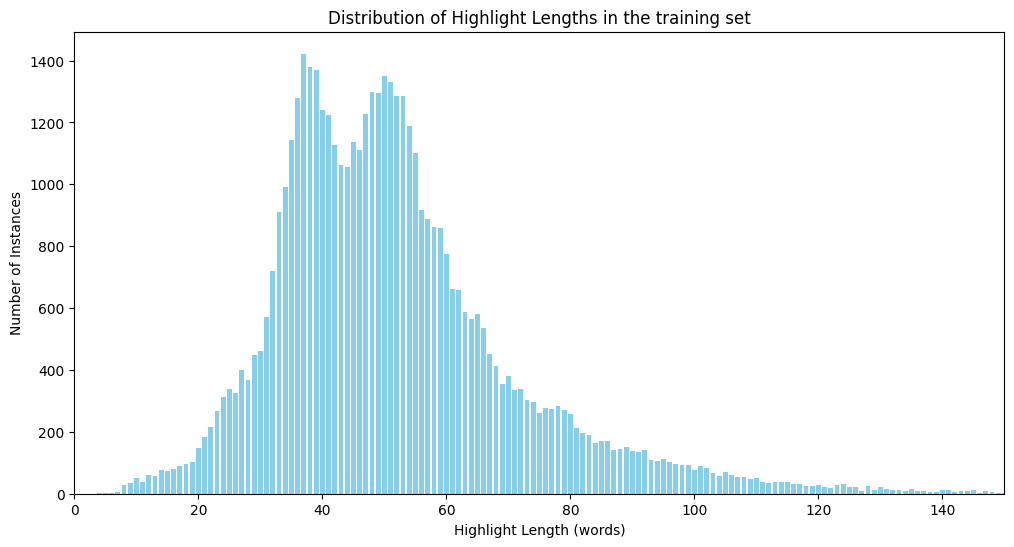

In [8]:
# Calculate the length of each highlight in the training set
highlight_lengths = [len(sample['highlights'].split()) for sample in train_dataset]

# Count the number of instances for each highlight length
length_counts = Counter(highlight_lengths)

# Prepare data for plotting
lengths = list(length_counts.keys())
counts = list(length_counts.values())

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(lengths, counts, color='skyblue')
plt.xlabel('Highlight Length (words)')
plt.ylabel('Number of Instances')
plt.title('Distribution of Highlight Lengths in the training set')
plt.xlim(0, 150)  # Limit x-axis for better visualization
plt.show()

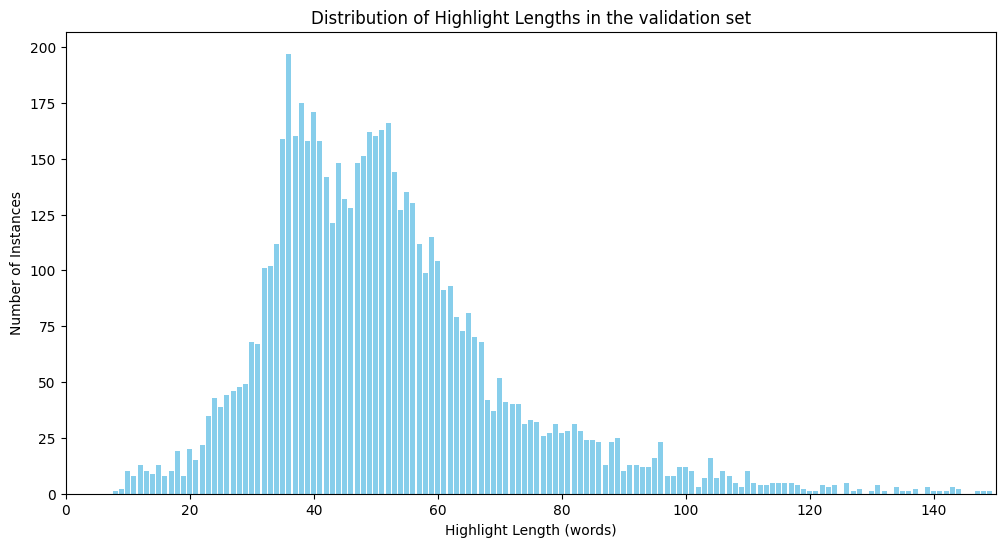

In [9]:
# Calculate the length of each highlight in the validation sets
highlight_lengths_val = [len(sample['highlights'].split()) for sample in val_dataset]

# Count the number of instances for each highlight length
length_counts_val = Counter(highlight_lengths_val)

# Prepare data for plotting
lengths_val = list(length_counts_val.keys())
counts_val = list(length_counts_val.values())

# Plot the distribution for validation set
plt.figure(figsize=(12, 6))
plt.bar(lengths_val, counts_val, color='skyblue')
plt.xlabel('Highlight Length (words)')
plt.ylabel('Number of Instances')
plt.title('Distribution of Highlight Lengths in the validation set')
plt.xlim(0, 150)
plt.show()

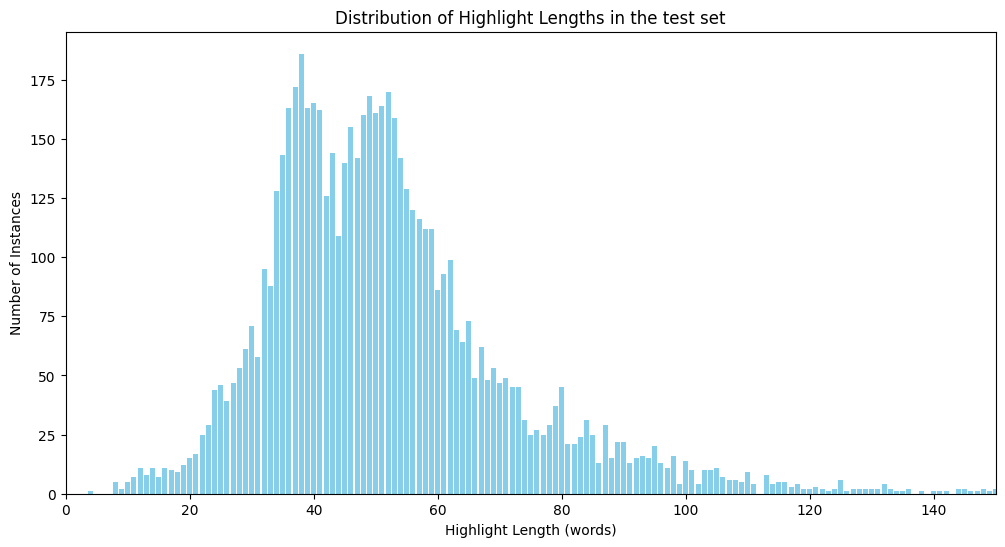

In [10]:
# Calculate the length of each highlight in the test sets
highlight_lengths_test = [len(sample['highlights'].split()) for sample in test_dataset]

# Count the number of instances for each highlight length
length_counts_test = Counter(highlight_lengths_test)

# Prepare data for plotting
lengths_test = list(length_counts_test.keys())
counts_test = list(length_counts_test.values())

# Plot the distribution for test set
plt.figure(figsize=(12, 6))
plt.bar(lengths_test, counts_test, color='skyblue')
plt.xlabel('Highlight Length (words)')
plt.ylabel('Number of Instances')
plt.title('Distribution of Highlight Lengths in the test set')
plt.xlim(0, 150)
plt.show()

In [22]:
min_article_len_train = min([len(sample['article'].split()) for sample in train_dataset])
max_article_len_train = max([len(sample['article'].split()) for sample in train_dataset])

min_article_len_val = min([len(sample['article'].split()) for sample in val_dataset])
max_article_len_val = max([len(sample['article'].split()) for sample in val_dataset])

min_article_len_test = min([len(sample['article'].split()) for sample in test_dataset])
max_article_len_test = max([len(sample['article'].split()) for sample in test_dataset])

print(f"Train set - Shortest article: {min_article_len_train} words, Longest article: {max_article_len_train} words")
print(f"Validation set - Shortest article: {min_article_len_val} words, Longest article: {max_article_len_val} words")
print(f"Test set - Shortest article: {min_article_len_test} words, Longest article: {max_article_len_test} words")

Train set - Shortest article: 32 words, Longest article: 2347 words
Validation set - Shortest article: 46 words, Longest article: 1913 words
Test set - Shortest article: 40 words, Longest article: 1900 words


In [21]:
# Find the shortest and longest highlight length for each split

min_highlight_len_train = min(highlight_lengths)
max_highlight_len_train = max(highlight_lengths)

min_highlight_len_val = min(highlight_lengths_val)
max_highlight_len_val = max(highlight_lengths_val)

min_highlight_len_test = min(highlight_lengths_test)
max_highlight_len_test = max(highlight_lengths_test)

print(f"Train set - Shortest highlight: {min_highlight_len_train} words, Longest highlight: {max_highlight_len_train} words")
print(f"Validation set - Shortest highlight: {min_highlight_len_val} words, Longest highlight: {max_highlight_len_val} words")
print(f"Test set - Shortest highlight: {min_highlight_len_test} words, Longest highlight: {max_highlight_len_test} words")

Train set - Shortest highlight: 4 words, Longest highlight: 564 words
Validation set - Shortest highlight: 8 words, Longest highlight: 311 words
Test set - Shortest highlight: 4 words, Longest highlight: 1106 words


## Conclusion
- **Dataset Size:** The original dataset is large, with over 287,000 training samples, while the subset contains about 20% of the data to accommodate hardware limitations.

- **Article and Highlight Lengths:** The average article length is around 690 words, and the average highlight (summary) length is about 52 words across all splits. There is some variation between the original and subset datasets, but the distributions are similar.

- **Vocabulary:** The datasets contain a rich and diverse vocabulary, with tens of thousands of unique words and tokens in each split.

- **Length Distributions:** Both articles and highlights show a wide range of lengths, with some very short and very long examples. The distributions of highlight lengths are visualized for each split, showing most highlights are under 100 words.

- **Data Consistency:** The subset maintains similar statistical properties to the original dataset, making it suitable for model training and evaluation under resource constraints.